In [1]:
import glob
import time
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle

from skimage.feature import hog
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from scipy.ndimage.measurements import label
import helpers
%load_ext autoreload
%autoreload 2

% matplotlib inline

In [2]:

color_space = 'YCrCb'  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 18  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
hog_channel = "ALL"  # Can be 0, 1, 2, or "ALL"
spatial_size = (64, 64)  # Spatial binning dimensions
nbins = 32
hist_bins = 64  # Number of histogram bins
hist_range = bins_range = (0,256)
spatial_feat = True  # Spatial features on or off
hist_feat = False  # Histogram features on or off
hog_feat = True  # HOG features on or off


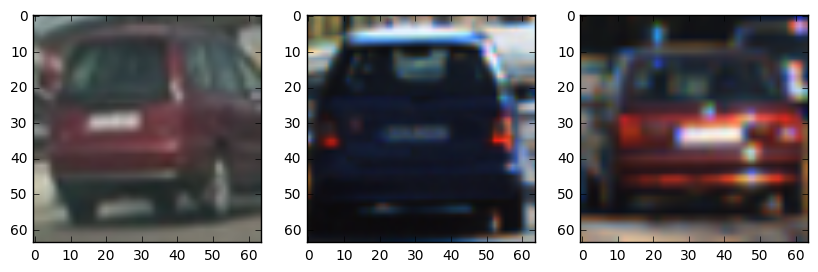

In [3]:
# Read the cars data:
cars_glob = glob.glob('vehicles/*/*.png')
cars = []

for image in cars_glob:
    cars.append(image)
    
# Visualize a set of random 3 images
fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=(10, 10))
rnd1 = random.randrange(0, len(cars))
_ = sp1.imshow(mpimg.imread(cars[rnd1]))
rnd2 = random.randrange(0, len(cars))
_ = sp2.imshow(mpimg.imread(cars[rnd2]))
rnd3 = random.randrange(0, len(cars))
_ = sp3.imshow(mpimg.imread(cars[rnd3]))


In [4]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block,
                     vis=False, feature_vec=True):
    # Return HOG Features for one image
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=True,
                       visualise=vis, feature_vector=feature_vec)
        return features

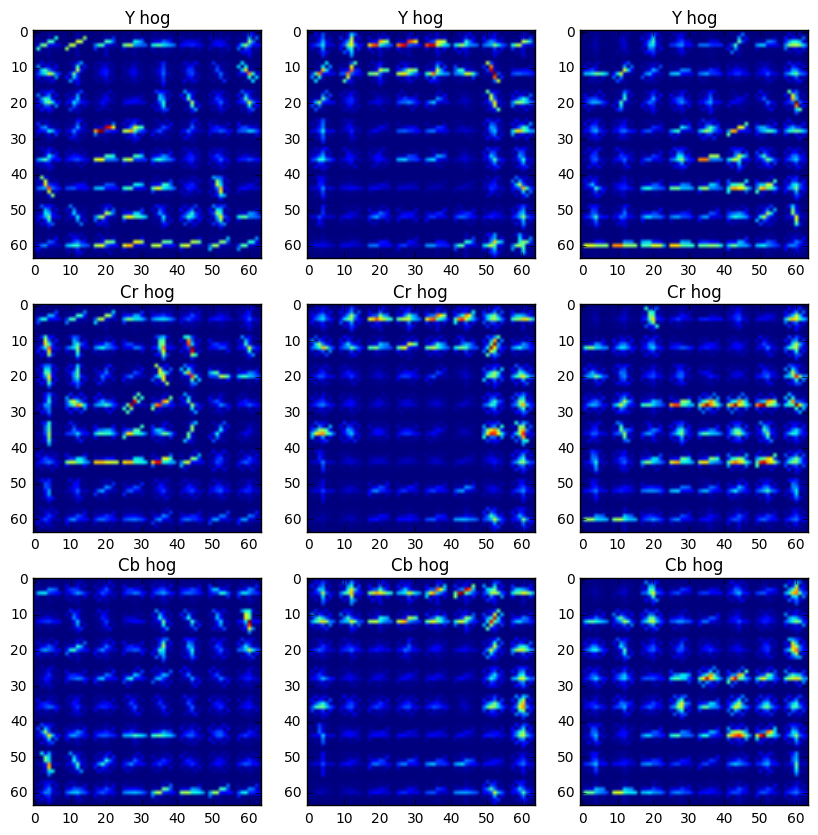

In [5]:
# Visualize the Y Channel of the previous images
fig, axarr = plt.subplots(3, 3, figsize=(10, 10))

rnd1_YCrCb  = cv2.cvtColor(mpimg.imread(cars[rnd1]), cv2.COLOR_RGB2YCrCb)
rnd2_YCrCb  = cv2.cvtColor(mpimg.imread(cars[rnd2]), cv2.COLOR_RGB2YCrCb)
rnd3_YCrCb  = cv2.cvtColor(mpimg.imread(cars[rnd3]), cv2.COLOR_RGB2YCrCb)


_, Y_hog = get_hog_features(rnd1_YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[0][0].set_title('Y hog')
_ = axarr[0][0].imshow(Y_hog)
    
_, Y_hog = get_hog_features(rnd2_YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[0][1].set_title('Y hog')
_ = axarr[0][1].imshow(Y_hog)
    
_, Y_hog = get_hog_features(rnd3_YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[0][2].set_title('Y hog')
_ = axarr[0][2].imshow(Y_hog)

# Cr Channel

_, Cr_hog = get_hog_features(rnd1_YCrCb[:,:,1], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[1][0].set_title('Cr hog')
_ = axarr[1][0].imshow(Cr_hog)
    
_, Cr_hog = get_hog_features(rnd2_YCrCb[:,:,1], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[1][1].set_title('Cr hog')
_ = axarr[1][1].imshow(Cr_hog)
    
_, Cr_hog = get_hog_features(rnd3_YCrCb[:,:,1], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[1][2].set_title('Cr hog')
_ = axarr[1][2].imshow(Cr_hog)

# Cb Channel 

_, Cb_hog = get_hog_features(rnd1_YCrCb[:,:,2], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[2][0].set_title('Cb hog')
_ = axarr[2][0].imshow(Cb_hog)
    
_, Cb_hog = get_hog_features(rnd2_YCrCb[:,:,2], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[2][1].set_title('Cb hog')
_ = axarr[2][1].imshow(Cb_hog)
    
_, Cb_hog = get_hog_features(rnd3_YCrCb[:,:,2], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[2][2].set_title('Cb hog')
_ = axarr[2][2].imshow(Cb_hog)

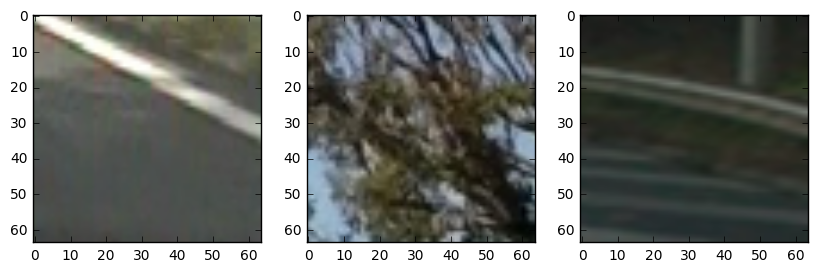

In [6]:
# Read the cars data:
non_cars_glob = glob.glob('non-vehicles/*/*.png')
non_cars = []

for image in non_cars_glob:
    non_cars.append(image)
    
# Visualize a set of random 3 images
fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=(10, 10))
rnd1 = random.randrange(0, len(non_cars))
_ = sp1.imshow(mpimg.imread(non_cars[rnd1]))
rnd2 = random.randrange(0, len(non_cars))
_ = sp2.imshow(mpimg.imread(non_cars[rnd2]))
rnd3 = random.randrange(0, len(non_cars))
_ = sp3.imshow(mpimg.imread(non_cars[rnd3]))

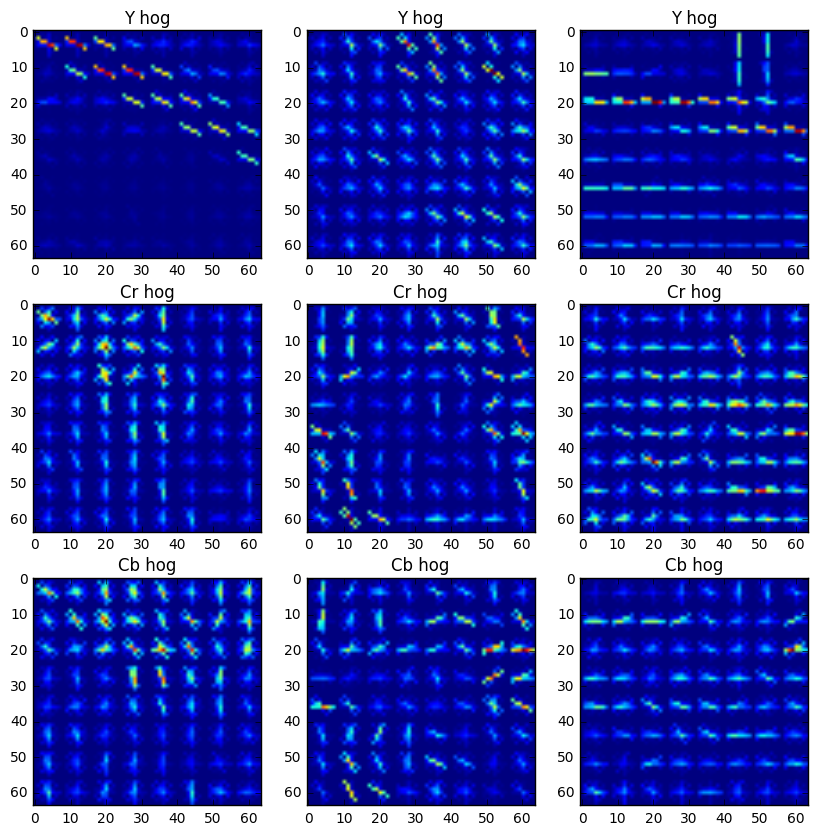

In [7]:
# Visualize the Y Channel of the previous images
fig, axarr = plt.subplots(3, 3, figsize=(10, 10))

rnd1_YCrCb  = cv2.cvtColor(mpimg.imread(non_cars[rnd1]), cv2.COLOR_RGB2YCrCb)
rnd2_YCrCb  = cv2.cvtColor(mpimg.imread(non_cars[rnd2]), cv2.COLOR_RGB2YCrCb)
rnd3_YCrCb  = cv2.cvtColor(mpimg.imread(non_cars[rnd3]), cv2.COLOR_RGB2YCrCb)


_, Y_hog = get_hog_features(rnd1_YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[0][0].set_title('Y hog')
_ = axarr[0][0].imshow(Y_hog)
    
_, Y_hog = get_hog_features(rnd2_YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[0][1].set_title('Y hog')
_ = axarr[0][1].imshow(Y_hog)
    
_, Y_hog = get_hog_features(rnd3_YCrCb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[0][2].set_title('Y hog')
_ = axarr[0][2].imshow(Y_hog)

# Cr Channel

_, Cr_hog = get_hog_features(rnd1_YCrCb[:,:,1], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[1][0].set_title('Cr hog')
_ = axarr[1][0].imshow(Cr_hog)
    
_, Cr_hog = get_hog_features(rnd2_YCrCb[:,:,1], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[1][1].set_title('Cr hog')
_ = axarr[1][1].imshow(Cr_hog)
    
_, Cr_hog = get_hog_features(rnd3_YCrCb[:,:,1], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[1][2].set_title('Cr hog')
_ = axarr[1][2].imshow(Cr_hog)

# Cb Channel 

_, Cb_hog = get_hog_features(rnd1_YCrCb[:,:,2], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[2][0].set_title('Cb hog')
_ = axarr[2][0].imshow(Cb_hog)
    
_, Cb_hog = get_hog_features(rnd2_YCrCb[:,:,2], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[2][1].set_title('Cb hog')
_ = axarr[2][1].imshow(Cb_hog)
    
_, Cb_hog = get_hog_features(rnd3_YCrCb[:,:,2], orient, pix_per_cell, cell_per_block, vis=True)
_ = axarr[2][2].set_title('Cb hog')
_ = axarr[2][2].imshow(Cb_hog)

### Extract HOG features for the dataset

In [ ]:
# Get the HOG features for each car and non-car images

car_features = helpers.extract_features(cars, color_space=color_space, spatial_size=spatial_size,
                     hist_bins=hist_bins, orient=orient,
                     pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                     hog_channel=hog_channel, spatial_feat=spatial_feat, 
                     hist_feat=hist_feat, 
                     hog_feat=hog_feat)

notcar_features = helpers.extract_features(non_cars, color_space=color_space, spatial_size=spatial_size,
                     hist_bins=hist_bins, orient=orient,
                     pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                     hog_channel=hog_channel, spatial_feat=spatial_feat, 
                     hist_feat=hist_feat, 
                     hog_feat=hog_feat)


### Train a Linear SVM model

In [ ]:
X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-col scaler and apply it to the data X
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

# Labels Vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets - I use a constant seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(scaled_X
                                                    , y
                                                    , test_size=0.15
                                                    , random_state=20)

# Create a Linear SVC Object
svc = LinearSVC()
    
# Fit the model to the training data
t = time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2 - t, 2), 'Seconds to train SVC...')

# Check the score of the SVC on the holdout set
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

# Check the prediction time for a single sample
t = time.time()

# Store the model and features to re-use later
filename = "svc.pkl"
joblib.dump(svc, filename)
pickle.dump(X_scaler,open("feats.pkl","wb"))


In [16]:

# Define a function to compute binned color features
def bin_spatial(img, size=spatial_size):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel()
    # Return the feature vector
    return features


# Define a function to compute color histogram features
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=nbins, bins_range=bins_range):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:, :, 0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:, :, 1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:, :, 2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [17]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space=color_space, spatial_size=spatial_size,
                     hist_bins=hist_bins, orient=orient,
                     pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                     hog_channel=hog_channel, spatial_feat=spatial_feat, 
                     hist_feat=hist_feat, 
                     hog_feat=hog_feat):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else:
            feature_image = np.copy(image)

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:, :, channel],
                                                         orient, pix_per_cell, cell_per_block,
                                                         vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)
            else:
                hog_features = get_hog_features(feature_image[:, :, hog_channel], orient,
                                                pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [18]:
# Define a function that takes an image,
# start and stop positions in both x and y,
# window size (x and y dimensions),
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None],
                 xy_window=(64, 64), xy_overlap=(0.5, 0.5),window_list=None):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0] * (1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1] * (1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_windows = np.int(xspan / nx_pix_per_step) - 1
    ny_windows = np.int(yspan / ny_pix_per_step) - 1
    # Initialize a list to append window positions to
    if window_list == None:
        window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs * nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys * ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]

            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


In [ ]:
# Define a function you will pass an image
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space=color_space,
                   spatial_size=spatial_size, hist_bins=hist_bins,
                   hist_range=hist_range, orient=orient,
                   pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                   hog_channel=hog_channel, spatial_feat=spatial_feat,
                   hist_feat=hist_feat, hog_feat=hog_feat):
    # 1) Create an empty list to receive positive detection windows
    on_windows = []
    # 2) Iterate over all windows in the list
    for window in windows:
        # 3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
        # 4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space,
                                       spatial_size=spatial_size, hist_bins=hist_bins,
                                       orient=orient, pix_per_cell=pix_per_cell,
                                       cell_per_block=cell_per_block,
                                       hog_channel=hog_channel, spatial_feat=spatial_feat,
                                       hist_feat=hist_feat, hog_feat=hog_feat)
        # 5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        # 6) Predict using your classifier
        prediction = clf.predict(test_features)
        # 7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)

    # 8) Return windows for positive detections
    return on_windows

In [ ]:
def single_img_features(img, color_space=color_space, spatial_size=spatial_size,
                     hist_bins=hist_bins, orient=orient,
                     pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                     hog_channel=hog_channel, spatial_feat=spatial_feat, 
                     hist_feat=hist_feat, 
                     hog_feat=hog_feat):
    # 1) Define an empty list to receive features
    img_features = []
    # 2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else:
        feature_image = np.copy(img)
    # 3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # 4) Append features to list
        img_features.append(spatial_features)
    # 5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        # 6) Append features to list
        img_features.append(hist_features)
    # 7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:, :, channel],
                                                     orient, pix_per_cell, cell_per_block,
                                                     vis=False, feature_vec=True))
        else:
            hog_features = get_hog_features(feature_image[:, :, hog_channel], orient,
                                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # 8) Append features to list
        img_features.append(hog_features)

    # 9) Return concatenated array of features
    return np.concatenate(img_features)


In [19]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap


def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [20]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
#     filterd_boxes = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    return img

In [21]:
def get_hot_windows(image, previous=None, count=0):

    y_start_stop = [int(image.shape[0]/2), image.shape[0]]
    
    xmin = None
    xmax = None
    
    if count % 2 != 0:
        if previous is not None:
            for car_number in range(1, previous[1]+1):
                nonzero = (previous[0] == car_number).nonzero()
                nonzerox = np.array(nonzero[1])
                if xmin is None:
                    xmin = np.min(nonzerox)
                else:
                    xmin = min(np.min(nonzerox),xmin)
                if xmax is None:
                    xmax = np.max(nonzerox)
                else:
                    xmax = max(np.max(nonzerox),xmax)
                
    if xmin is not None and xmin > 50:
        xmin = xmin - 50
    if xmax is not None and xmax + 50 < image.shape[1]:
        xmax = xmax + 50
                
    x_start_stop = [xmin, xmax]

    windows = slide_window(image, x_start_stop=x_start_stop, y_start_stop=[int(image.shape[0]/2)+25,int(image.shape[0]/2+100)],
                             xy_window=(80, 80), xy_overlap=(0.90, 0.90))

    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space,
                                 spatial_size=spatial_size, hist_bins=hist_bins,
                                 orient=orient, pix_per_cell=pix_per_cell,
                                 cell_per_block=cell_per_block,
                                 hog_channel=hog_channel, spatial_feat=spatial_feat,
                                 hist_feat=hist_feat, hog_feat=hog_feat)
    return hot_windows






In [ ]:
def average_bboxes(image,detected=None):
    # image = mpimg.imread('test_images/test2.jpg')
    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    copy_image = np.copy(image)
    image = image.astype(np.float32) / 255

    
    count = 0 
    previousLabels = None

    if detected is not None:
        previousLabels = detected.labels
        count = detected.iteration
    
    hot_windows = get_hot_windows(image,previous=previousLabels,count=count)
    heat = np.zeros_like(image[:, :, 0]).astype(np.float)
    heatmap = add_heat(heatmap=heat, bbox_list=hot_windows)

    if detected is None:
        detected = Vehicle()
        
    if len(detected.previousHeat)<detected.averageCount:
        for i in range(detected.averageCount):
            detected.previousHeat.append(np.copy(heatmap).astype(np.float))
        
    detected.previousHeat[detected.iteration%detected.averageCount] = heatmap
    total = np.zeros(np.array(detected.previousHeat[0]).shape)
    
    for value in detected.previousHeat:
        total += np.array(value)
    
    averageHeatMap = total/detected.averageCount
    
    averageHeatMap = apply_threshold(averageHeatMap,2)
        
    labels = label(averageHeatMap)
    
    detected.labels = labels
    detected.iteration += 1
    
    window_img = draw_labeled_bboxes(copy_image, labels)
    return window_img, averageHeatMap

In [ ]:
class Vehicle:
    def __init__(self):
        self.previousHeat = []
        self.labels = []
        self.iteration = 0 
        self.averageCount = 10

In [28]:
car = Vehicle()
        
def process_frame(frame):
    img, avg_heat_map = average_bboxes(image=frame,detected=car)
    return img

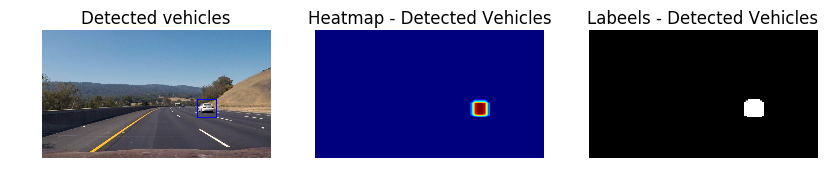

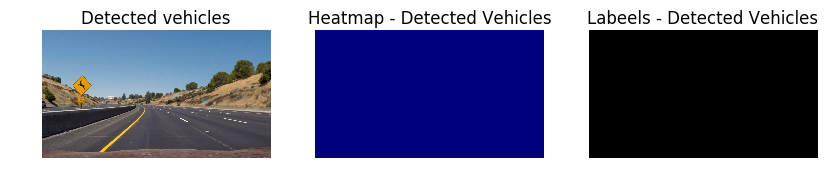

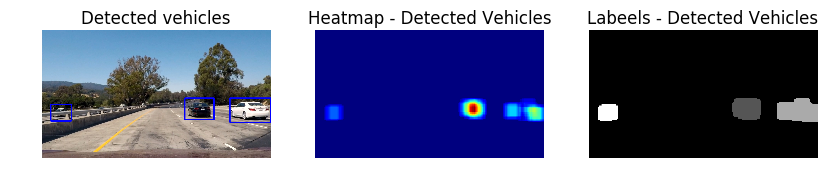

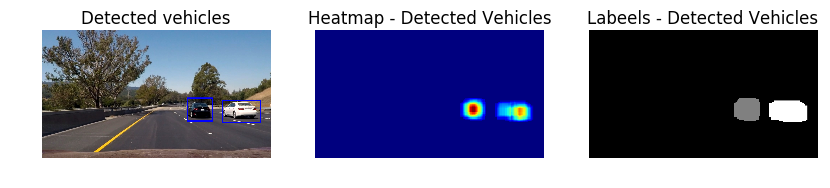

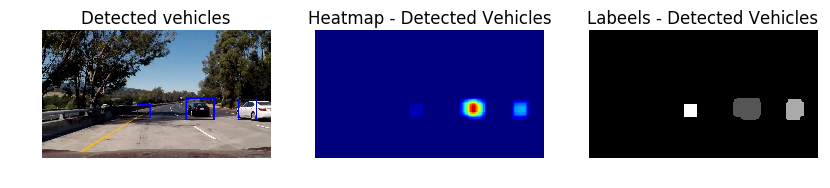

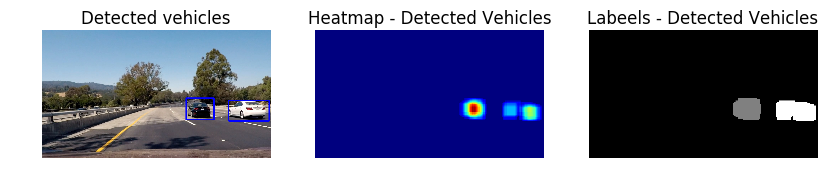

In [25]:
test_set = glob.glob("test_images/*.jpg")

for test_img in test_set:
    img = mpimg.imread(test_img)
    window_img, heatmap = average_bboxes(img)
    fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=(10,10))
    heatmap = helpers.apply_threshold(heatmap, 1)
    labels = label(heatmap)
    
    sp1.imshow(window_img)
    sp2.imshow(heatmap)
    sp3.imshow(labels[0], cmap='gray')
    sp1.set_title('Detected vehicles')
    sp2.set_title('Heatmap - Detected Vehicles')
    sp3.set_title('Labeels - Detected Vehicles')
    sp1.axis('off')
    sp2.axis('off')
    sp3.axis('off')


In [8]:
from moviepy.editor import VideoFileClip

X_scaler = pickle.load(open("feats.pkl", "rb"))
svc = joblib.load("svc.pkl")

In [29]:
video_output = 'out_final.mp4'
clip = VideoFileClip("project_video.mp4")
video_clip = clip.fl_image(process_frame)
%time video_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video out_final.mp4
[MoviePy] Writing video out_final.mp4


100%|█████████▉| 1260/1261 [1:36:04<00:05,  5.28s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: out_final.mp4 

CPU times: user 1h 35min 59s, sys: 2.7 s, total: 1h 36min 1s
Wall time: 1h 36min 5s
